In [1]:
%matplotlib widget
from CG import *

## 7. The Method of Conjugate Directions <a id="7"></a>

### 7.1. Conjugacy <a id="7.1"></a>

Steepest Descent often finds itself taking steps in the same direction as earlier steps (see Figure 8). Wouldn’t it be better if, every time we took a step, we got it right the first time? Here’s an idea: let’s pick a set of orthogonal *search directions* $d_{[0]}, d_{[1]}, \dots, d_{[n-1]}$ In each search direction, we’ll take exactly one step, and that step will be just the right length to line up evenly with $x$. After $n$ steps, we’ll be done.

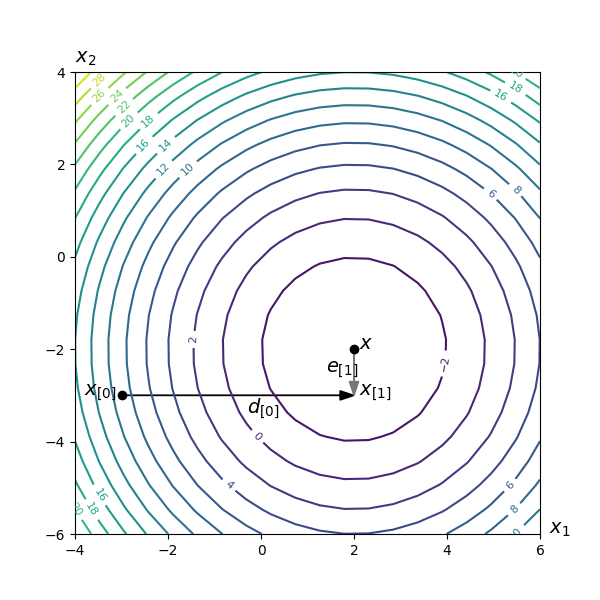

In [2]:
fig21()

<center>Figure 21: The Method of Orthogonal Directions. Unfortunately, this method only works if you already know the answer.</center>

Figure 21 illustrates this idea, using the coordinate axes as search directions. The first (horizontal) step leads to the correct $x_1$-coordinate; the second (vertical) step will hit home. Notice that $e_{[1]}$ is orthogonal to $d_{[0]}$. In general, for each step we choose a point

\begin{equation}
x_{[i+1]} = x_{[i]} + \alpha_{[i]}d_{[i]}. \tag{29}
\end{equation}

To find the value of $\alpha_{[i]}$, use the fact that $e_{[i+1]}$ should be orthogonal to $d_{[i]}$, so that we need never step in the direction of $d_{[i]}$ again. Using this condition, we have

\begin{align*}
d^T_{[i]}e_{[i+1]} &= 0 \\
d^T_{[i]}(e_{[i]} + \alpha_{[i]}d_{[i]}) &= 0 \qquad \text{(by Equation 29)} \\
\alpha_{[i]} &= -\frac{d^T_{[i]}e_{[i]}}{d^T_{[i]}d_{[i]}}. \tag{30}
\end{align*}

Unfortunately, we haven’t accomplished anything, because we can’t compute $\alpha_{[i]}$ without knowing $e_{[i]}$; and if we knew $e_{[i]}$, the problem would already be solved.

The solution is to make the search directions $A$-orthogonal instead of orthogonal. Two vectors $d_{[i]}$ and $d_{[j]}$ are *$A$-orthogonal*, or *conjugate*, if

$$
d^T_{[i]}Ad_{[j]} = 0.
$$

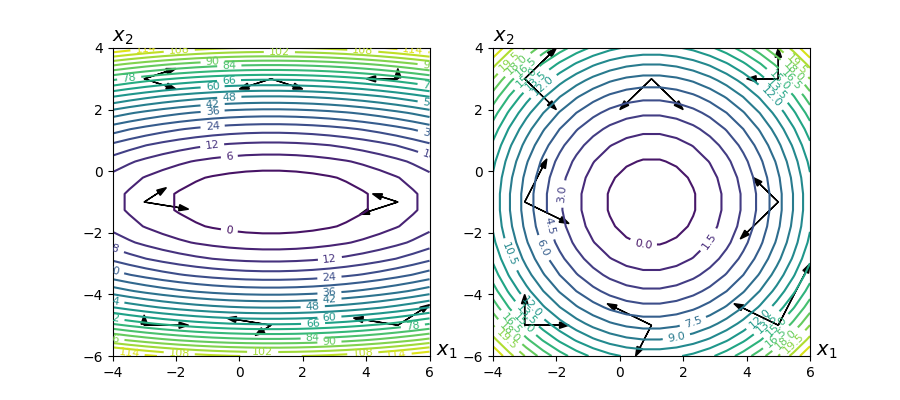

In [3]:
fig22()

<center>Figure 22: The pairs of vectors in (a) are $A$-orthogonal, because the pairs of vectors in (b) are orthogonal.</center>

Figure 22(a) shows what $A$-orthogonal vectors look like. Imagine if this article were printed on bubble gum, and you grabbed Figure 22(a) by the ends and stretched it until the ellipses appeared circular. The vectors would then appear orthogonal, as in Figure 22(b).

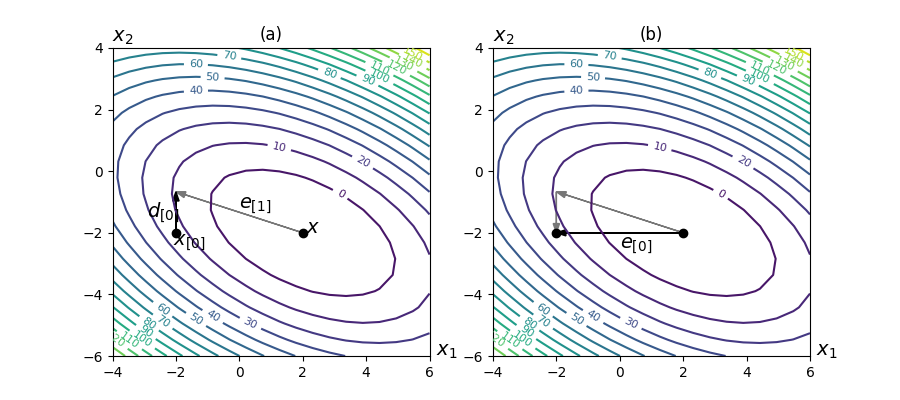

In [4]:
fig23()

<center>Figure 23: The method of Conjugate Directions converges in $n$ steps. (a) The first step is taken along some direction $d_{[0]}$. The minimum point $x_{[1]}$ is chosen by the constraint that $e_{[1]}$ must be $A$-orthogonal to $d_{[0]}$. (b) The initial error $e_{[0]}$ can be expressed as a sum of $A$-orthogonal components (gray arrows). Each step of Conjugate Directions eliminates one of these components.</center>

Our new requirement is that $e_{[i+1]}$ be $A$-orthogonal to $d_{[i]}$ (see Figure 23(a)). Not coincidentally, this orthogonality condition is equivalent to finding the minimum point along the search direction $d_{[i]}$, as in Steepest Descent. To see this, set the directional derivative to zero:

\begin{align*}
\frac{d}{d\alpha}f(x_{[i+1]}) &= 0 \\
f'(x_{[i+1]})^T\frac{d}{d\alpha}x_{[i+1]} &= 0 \\
-r^T_{[i+1]}d_{[i]} &= 0 \\
d^T_{[i]} A e_{[i+1]} &= 0.
\end{align*}

Following the derivation of Equation 30, here is the expression for $\alpha_{[i]}$ when the search directions are $A$-orthogonal:

\begin{align*}
\alpha_{[i]} &= -\frac{d^T_{[i]} A e_{[i]}}{d^T_{[i]} A d_{[i]}} \tag{31} \\
 &= -\frac{d^T_{[i]}r_{[i]}}{d^T_{[i]} A d_{[i]}}. \tag{32}
\end{align*}

Unlike Equation 30, we can calculate this expression. Note that if the search vector were the residual, this formula would be identical to the formula used by Steepest Descent.

To prove that this procedure really does compute $x$ in $n$ steps, express the error term as a linear combination of search directions; namely,

\begin{equation}
e_{[0]} = \sum^{j-1}_{j=0} \delta_j d_{[j]}. \tag{33}
\end{equation}

The values of can be found by a mathematical trick. Because the search directions are $A$-orthogonal, it is possible to eliminate all the $\delta_j$values but one from Expression 33 by premultiplying the expression by $d^T_{[k]} A$:

\begin{align*}
d^T_{[k]} A e_{[0]} &= \sum_j \delta_{[j]} d^T_{[k]} A d_{[j]} \\
d^T_{[k]} A e_{[0]} &= \delta_{[k]} d^T_{[k]} A d_{[j]} &\qquad  \text{(by }A\text{-orthogonality of } d \text{ vectors)} \\
\delta_{[k]} &= \frac{d^T_{[k]} A e_{[0]}}{d^T_{[k]} A d_{[k]}} \\
&= \frac{d^T_{[k]} A (e_{[0]} + \sum^{k-1}_{i=0} \alpha_{[i]} d_{[i]})}{d^T_{[k]} A d_{[k]}} &\qquad  \text{(by }A\text{-orthogonality of } d \text{ vectors)} \\
&= \frac{d^T_{[k]} A e_{[k]}}{d^T_{[k]} A d_{[k]}} &\qquad  \text{(by Equation 29).} \tag{34}
\end{align*}

By Equations 31 and 34, we find that $\alpha_{[i]} = -\delta_{[i]}$. This fact gives us a new way to look at the error term. As the following equation shows, the process of building up $x$ component by component can also be viewed as a process of cutting down the error term component by component (see Figure 23(b)).

\begin{align*}
e_{[i]} &= e_{[0]} + \sum^{i-1}_{j=0} \alpha_{[j]} d_{[j]} \\
&= \sum^{n-1}_{j=0} \delta_{[j]} d_{[j]} - \sum^{i-1}_{j=0} \delta_{[j]} d_{[j]} \\
&= \sum^{n-1}_{j=i} \delta_{[j]} d_{[j]} \tag{35}
\end{align*}

After $n$ iterations, every component is cut away, and $e_{[n]}=0$; the proof is complete.

### 7.2. Gram-Schmidt Conjugation <a id="7.2"></a>

All that is needed now is a set of $A$-orthogonal search directions {$d_{[i]}$}. Fortunately, there is a simple way to generate them, called a *conjugate Gram-Schmidt process*.

Suppose we have a set of $n$ linearly independent vectors $\mu_0, \mu_1, \dots, \mu_{n-1}$. The coordinate axes will do in a pinch, although more intelligent choices are possible. To construct $d_{[i]}$, take $\mu_i$ and subtract out any components that are not $A$-orthogonal to the previous $d$ vectors (see Figure 24). In other words, set $d_{[0]} = \mu_0$ and for $i>0$, set

\begin{equation}
d_{[i]} = \mu_i + \sum^{i-1}_{k=0} \beta_{ik} d_{[k]}, \tag{36}
\end{equation}

where the $\beta_{ik}$ are defined for $i>k$. To find their values, use the same trick used to find $\delta_j$:

\begin{align*}
d^T_{[i]} A d_{[j]} &= \mu^T_i A d_{[j]} + \sum^{i-1}_{k=0} \beta_{ik} d^T_{[k]} A d_{[j]} \\
0 &= \mu^T_i A d_{[j]} + \beta_{ij} d^T_{[j]} A d_{[j]},\ i>j \quad  \text{(by }A\text{-orthogonality of } d \text{ vectors)} \\
\beta_{ij} &= -\frac{\mu^T_i A d_{[j]}}{d^T_{[j]} A d_{[j]}} \tag{37}
\end{align*}

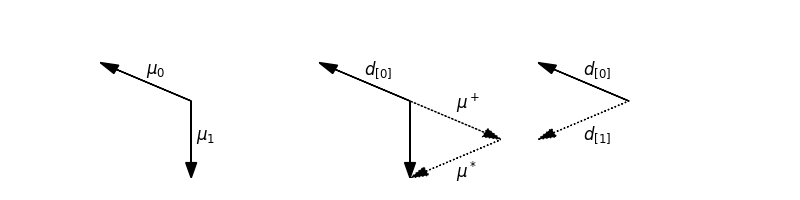

In [5]:
fig24()

<center>Figure 24: Gram-Schmidt conjugation of two vectors. Begin with two linearly independent vectors $\mu_0$ and $\mu_1$. Set $d_{[0]} = \mu_0$. The vector $\mu_1$ is composed of two components: $\mu^*$, which is $A$-orthogonal (or conjugate) to $d_{[0]}$, and $\mu^+$, which is parallel to $d_{[0]}$. After conjugation, only the $A$-orthogonal portion remains, and $d_{[1]} = \mu^*$.</center>

The difficulty with using Gram-Schmidt conjugation in the method of Conjugate Directions is that all the old search vectors must be kept in memory to construct each new one, and furthermore $\mathcal{O}(n^3)$ operations are required to generate the full set. In fact, if the search vectors are constructed by conjugation of the axial unit vectors, Conjugate Directions becomes equivalent to performing Gaussian elimination (see Figure 25). As a result, the method of Conjugate Directions enjoyed little use until the discovery of CG — which *is* a method of Conjugate Directions — cured these disadvantages.

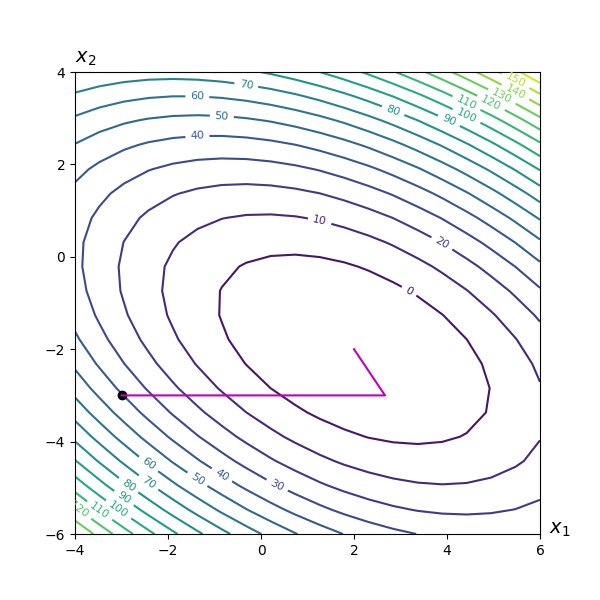

In [6]:
fig25()

<center>Figure 25: The method of Conjugate Directions using the axial unit vectors, also known as Gaussian elimination.</center>

An important key to understanding the method of Conjugate Directions (and also CG) is to notice that Figure 25 is just a stretched copy of Figure 21! Remember that when one is performing the method of Conjugate Directions (including CG), one is simultaneously performing the method of Orthogonal Directions in a stretched (scaled) space.

### 7.3. Optimality of the Error Term <a id="7.3"></a>

Conjugate Directions has an interesting property: it finds at every step the best solution within the bounds of where it’s been allowed to explore. Where has it been allowed to explore? Let $\mathcal{D}_i$ be the $i$-dimensional subspace span{$d_{[0]}, d_{[1]}, \dots, d_{[i-1]}$}; the value $e_{[i]}$ is chosen from $e_{[0]} + \mathcal{D}_i$. What do I mean by "best solution"? I mean that Conjugate Directions chooses the value from $e_{[0]} + \mathcal{D}_i$ that minimizes $\|e_{[i]}\|_A$ (see Figure 26). In fact, some authors derive CG by trying to minimize $\|e_{[i]}\|_A$ within $e_{[0]} + \mathcal{D}_i$.

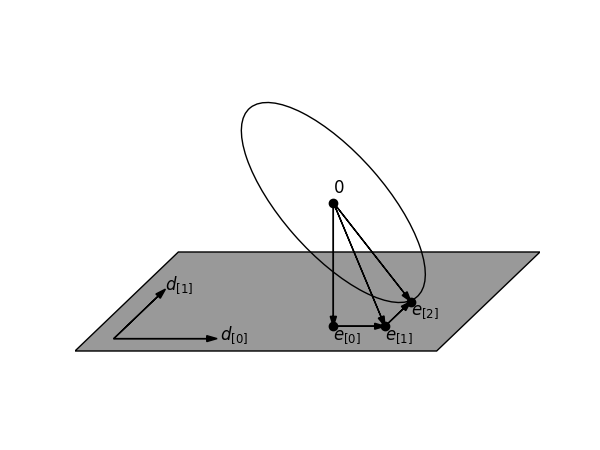

In [7]:
fig26()

<center>Figure 26: In this figure, the shaded area is $e_{[0]} + \mathcal{D}_2 = e_{[0]} +$span{$d_{[0]},d_{[1]}$}. The ellipsoid is a contour on which the energy norm is constant. After two steps, Conjugate Directions finds $e_{[2]}$, the point on $e_{[0]} + \mathcal{D}_2$ that minimizes $||e||_A$.</center>

In the same way that the error term can be expressed as a linear combination of search directions (Equation 35), its energy norm can be expressed as a summation.

\begin{align*}
\|e_{[i]}\|_A &= \sum^{n-1}_{j=i}\sum^{n-1}_{k=i} \delta_{[j]} \delta_{[k]} d^T_{[j]} A d_{[k]} &\quad \text{(by Equation 35)}\\
&= \sum^{n-1}_{j=i} \delta^2_{[j]} d^T_{[j]} A d_{[j]} &\quad \text{(by }A\text{-orthogonality of } d \text{ vectors)}
\end{align*}

Each term in this summation is associated with a search direction that has not yet been traversed. Any other vector $e$ chosen from $e_{[0]} + \mathcal{D}_i$ must have these same terms in its expansion, which proves that $e_{[i]}$ must have the minimum energy norm.

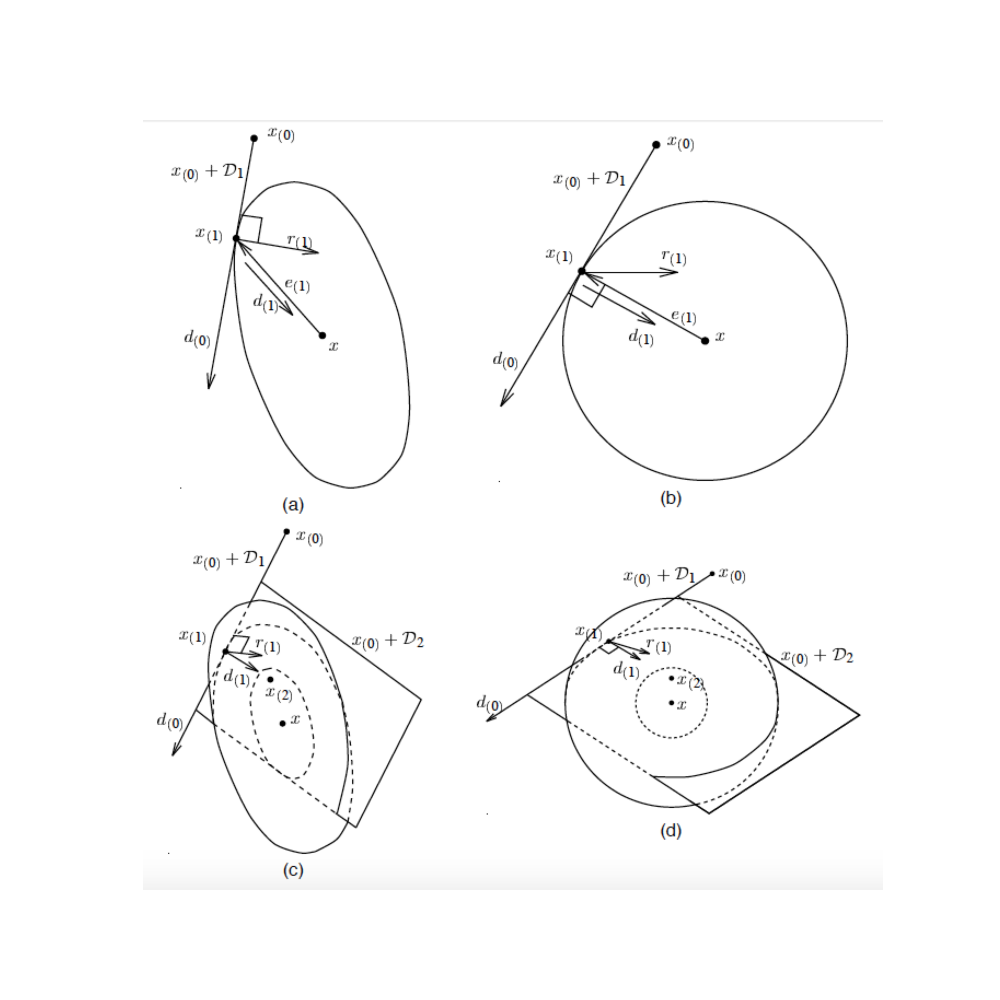

In [8]:
figload(27, (10,10))

<center>Figure 27: Optimality of the Method of Conjugate Directions. (a) A two-dimensional problem. Lines that appear perpendicular are orthogonal. (b) The same problem in a “stretched” space. Lines that appear perpendicular are $A$-orthogonal. (c) A three-dimensional problem. Two concentric ellipsoids are shown; $x$ is at the center of both. The line $x_{[0]} + \mathcal{D}_1$ is tangent to the outer ellipsoid at $x_{[1]}$. The plane $x_{[0]} + \mathcal{D}_2$ is tangent to the inner ellipsoid at $x_{[2]}$. (d) Stretched view of the three-dimensional problem.</center>

Having proven the optimality with equations, let’s turn to the intuition. Perhaps the best way to visualize the workings of Conjugate Directions is by comparing the space we are working in with a “stretched” space, as in Figure 22. Figures 27(a) and 27(c) demonstrate the behavior of Conjugate Directions in $\mathbb{R}^2$ and $\mathbb{R}^3$; lines that appear perpendicular in these illustrations are orthogonal. On the other hand, Figures 27(b) and
27(d) show the same drawings in spaces that are stretched (along the eigenvector axes) so that the ellipsoidal contour lines become spherical. Lines that appear perpendicular in these illustrations are $A$-orthogonal.

In Figure 27(a), the Method of Conjugate Directions begins at $x_{[0]}$ , takes a step in the direction of $d_{[0]}$, and stops at the point $x_{[1]}$, where the error vector $e_{[1]}$ is $A$-orthogonal to $d_{[0]}$. Why should we expect this to be the minimum point on $x_{[0]} + \mathcal{D}_1$? The answer is found in Figure 27(b): in this stretched space, $e_{[1]}$ appears perpendicular to $d_{[0]}$ because they are $A$-orthogonal. The error vector $e_{[1]}$ is a radius of the concentric circles that represent contours on which $\|e\|_A$ is constant, so $x_{[0]} + \mathcal{D}_1$ must be tangent at $x_{[1]}$ to the circle that $x_{[1]}$ lies on. Hence, $x_{[1]}$ is the point on $x_{[0]} + \mathcal{D}_1$ that minimizes $\|e_{[1]}\|_A$.

This is not surprising; we have already seen in Section 7.1 that $A$-conjugacy of the search direction and the error term is equivalent to minimizing $f$ (and therefore $\|e\|_A$) along the search direction. However, after Conjugate Directions takes a second step, minimizing $\|e\|_A$ along a second search direction $d_{[1]}$, why should we expect that $\|e\|_A$ will still be minimized in the direction of $d_{[0]}$? After taking $i$ steps, why will $f(x_{[i]})$ be minimized over all of $x_{[0]} + \mathcal{D}_1$?

In Figure 27(b), $d_{[0]}$ and $d_{[1]}$ appear perpendicular because they are $A$-orthogonal. It is clear that $d_{[1]}$ must point to the solution $x$, because $d_{[0]}$ is tangent at $x_{[1]}$ to a circle whose center is $x$. However, a three-dimensional example is more revealing. Figures 27(c) and 27(d) each show two concentric ellipsoids. The point $x_{[1]}$ lies on the outer ellipsoid, and $x_{[2]}$ lies on the inner ellipsoid. Look carefully at these figures: the plane $x_{[0]} + \mathcal{D}_2$ slices through the larger ellipsoid, and is tangent to the smaller ellipsoid at $x_{[2]}$. The point is at the center of the ellipsoids, underneath the plane.

Looking at Figure 27(c), we can rephrase our question. Suppose you and I are standing at $x_{[1]}$, and want to walk to the point that minimizes $\|e\|$ on $x_{[0]} + \mathcal{D}_2$; but we are constrained to walk along the search direction $d_{[1]}$. If $d_{[1]}$ points to the minimum point, we will succeed. Is there any reason to expect that $d_{[1]}$ will point the right way?

Figure 27(d) supplies an answer. Because $d_{[1]}$ is $A$-orthogonal to $d_{[0]}$, they are perpendicular in this diagram. Now, suppose you were staring down at the plane $x_{[0]} + \mathcal{D}_2$ as if it were a sheet of paper; the sight you’d see would be identical to Figure 27(b). The point $x_{[2]}$ would be at the center of the paper, and the point $x$ would lie underneath the paper, directly under the point $x_{[2]}$. Because $d_{[0]}$ and $d_{[1]}$ are perpendicular, $d_{[1]}$ points directly to $x_{[2]}$, which is the point in $x_{[0]} + \mathcal{D}_2$ closest to $x$. The plane $x_{[0]} + \mathcal{D}_2$ is tangent to the sphere on which $x_{[2]}$ lies. If you took a third step, it would be straight down from $x_{[2]}$ to $x$, in a direction $A$-orthogonal to $\mathcal{D}_2$.

Another way to understand what is happening in Figure 27(d) is to imagine yourself standing at the solution point $x$, pulling a string connected to a bead that is constrained to lie in $x_{[0]} + \mathcal{D}_i$. Each time the *expanding subspace* $\mathcal{D}$ is enlarged by a dimension, the bead becomes free to move a little closer to you. Now if you stretch the space so it looks like Figure 27(c), you have the Method of Conjugate Directions.

Another important property of Conjugate Directions is visible in these illustrations. We have seen that, at each step, the hyperplane $x_{[0]} + \mathcal{D}_i$ is tangent to the ellipsoid on which $x_{[i]}$ lies. Recall from Section 4 that the residual at any point is orthogonal to the ellipsoidal surface at that point. It follows that $r_{[i]}$ is orthogonal to $\mathcal{D}_i$ as well. To show this fact mathematically, premultiply Equation 35 by $-d^T_{[i]}A$:

\begin{align*}
-d^T_{[i]} A e_{[j]} &= - \sum^{n-1}_{j=i} \delta_{[j]} d^T_{[i]} A d_{[j]} \tag{38} \\
d^T_{[i]} r_{[j]} &= 0, \quad i<j \qquad \text{(by }A\text{-orthogonality of }d\text{ vectors).} \tag{39}
\end{align*}

We could have derived this identity by another tack. Recall that once we take a step in a search direction, we need never step in that direction again; the error term is evermore $A$-orthogonal to all the old search directions. Because $r_{[i]} = -Ae_{[i]}$, the residual is evermore orthogonal to all the old search directions.

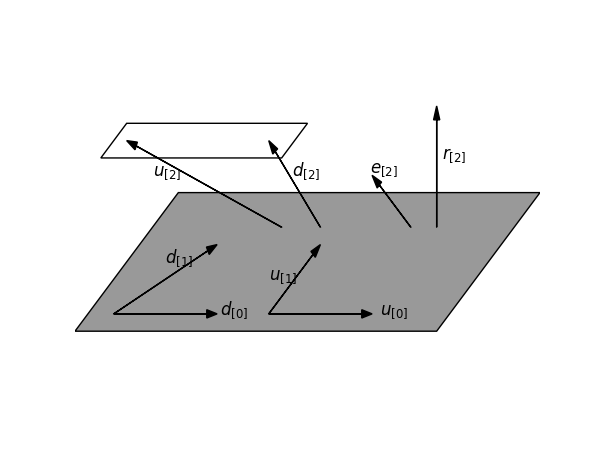

In [9]:
fig28()

<center>Figure 28: Because the search directions $d_{[0]},d_{[1]}$ are constructed from the vectors $\mu_0, \mu_1$, they span the same subspace $\mathcal{D}_2$ (the gray-colored plane). The error term $e_{[2]}$ is $A$-orthogonal to $\mathcal{D}_2$, the residual $r_{[2]}$ is orthogonal to $\mathcal{D}_2$, and a new search direction $d_{[2]}$ is constructed (from $\mu_2$) to be $A$-orthogonal to $\mathcal{D}_2$. The
endpoints of $\mu_2$ and $d_{[2]}$ lie on a plane parallel to $\mathcal{D}_2$, because $d_{[2]}$ is constructed from $\mu_2$ by Gram-Schmidt conjugation.</center>

Because the search directions are constructed from the $\mu$ vectors, the subspace spanned by $\mu_0, \mu_1, \dots, \mu_{n-1}$ is $\mathcal{D}_i$, and the residual $r_{[i]}$ is orthogonal to these previous vectors as well (see Figure 28). This is proven by taking the inner product of Equation 36 and $r_{[j]}$:

\begin{align*}
d^T_{[i]}r_{[j]} &= \mu^T_i r_{[j]} + \sum^{i-1}_{k=0} \beta_{ik} d^T_{[k]}r_{[j]} \tag{40} \\
0 &= \mu^T_i r_{[j]}, \quad i<j \qquad \text{(by Equation 39).} \tag{41}
\end{align*}

There is one more identity we will use later. From Equation 40 (and Figure 28),

\begin{equation}
d^T_{[i]} r_{[i]} = \mu^T_i r_{[i]}. \tag{42}
\end{equation}

To conclude this section, I note that as with the method of Steepest Descent, the number of matrix-vector products per iteration can be reduced to one by using a recurrence to find the residual:

\begin{align*}
r_{[i+1]} &= -A e_{[i+1]} \\
&= -A(e_{[i]} + \alpha_{[i]} d_{[i]}) \\
&= r_{[i]} - \alpha_{[i]} A d_{[i]}. \tag{43}
\end{align*}

Next: [8. The Method of Conjugate Gradients](CG08.ipynb)